In [19]:
import pathlib
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = [12, 8]

import yaml

from utilities import *

import utilities as u


import itertools

In [2]:
values_file = 'configurations/configILC_plotting_validation_check.yaml' 
with open(values_file, 'r') as stream:
            data = yaml.safe_load(stream)

In [3]:


plots_directory = data['plotsdirectory']

analysis_directory = data['analysisdirectory']

savingdirectory = data['savingdirectory']

Nsims = data['Nsims']

results_directory = data['resultsdirectory']
spectra_path = data['spectra_path']
sims_directory = data['sims_directory']
WR = u.write_read(sims_directory)

PP = pathlib.Path(analysis_directory)
Pplots = pathlib.Path(plots_directory)

fgnamefiles = data['fgnamefiles']

estimators_dictionary = data['estimators']
estimators = list(estimators_dictionary.keys())


lista_lmaxes = []

names = {}

for e in estimators:
    elemento = estimators_dictionary[e]
    names[e] = elemento['direc_name']
    lmax_min, lmax_max = elemento['lmax_min'], elemento['lmax_max']
    num = elemento['number']
    lista_lmaxes += [np.linspace(lmax_min, lmax_max, num, dtype = int)]

lmaxes_configs = list(itertools.product(*lista_lmaxes))


#CHOOSE nu
nu = estimators_dictionary[estimators[0]]['nu']

In [4]:
colors_ests = {}
labels_ests = {}
for e in estimators:
    colors_ests[e] = estimators_dictionary[e]['color']
    labels_ests[e] = estimators_dictionary[e]['label']

In [5]:
estimators_dictionary

{'hu_ok': {'nu': 'ilc',
  'hardening': '',
  'tszprofile': '',
  'lmax_min': 3000,
  'lmax_max': 4500,
  'number': 4,
  'direc_name': 'h',
  'color': 'blue',
  'label': 'QE',
  'field_names': ['ilcA', 'ilcB']},
 'shear': {'nu': 'ilc',
  'hardening': '',
  'tszprofile': '',
  'lmax_min': 3000,
  'lmax_max': 4500,
  'number': 4,
  'direc_name': 's',
  'color': 'red',
  'label': 'Shear',
  'field_names': ['ilcA', 'ilcB']},
 'bh': {'nu': 'ilc',
  'hardening': 'srcbh',
  'tszprofile': '',
  'lmax_min': 2000,
  'lmax_max': 4500,
  'number': 6,
  'direc_name': 'b',
  'color': 'green',
  'label': 'BH',
  'field_names': ['ilcA', 'ilcB']},
 'pbh': {'nu': 'ilc',
  'hardening': 'srcpbh',
  'tszprofile': 1,
  'lmax_min': 2000,
  'lmax_max': 4500,
  'number': 6,
  'direc_name': 'p',
  'color': 'purple',
  'label': 'PBH',
  'field_names': ['ilcA', 'ilcB']},
 'symm': {'nu': ['ilc', 'ilc_depr'],
  'hardening': '',
  'tszprofile': '',
  'lmax_min': 2500,
  'lmax_max': 4500,
  'number': 5,
  'direc_name'

In [6]:
estimators

['hu_ok', 'shear', 'bh', 'pbh', 'symm', 'symm-shear', 'symmbh', 'symmpbh']

In [7]:
lmax_directory = ''
for a in estimators_dictionary.keys():
    stringa = estimators_dictionary[a]['direc_name']
    lmax_directory += f'{stringa}3500'
lmax_directory

'h3500s3500b3500p3500sy3500shas3500sybh3500sypbh3500'

In [8]:
dic = u.dictionary(savingdirectory, lmax_directory)

In [9]:
savingdirectory

'output_biases_ILC_validation/'

## ReconxInput

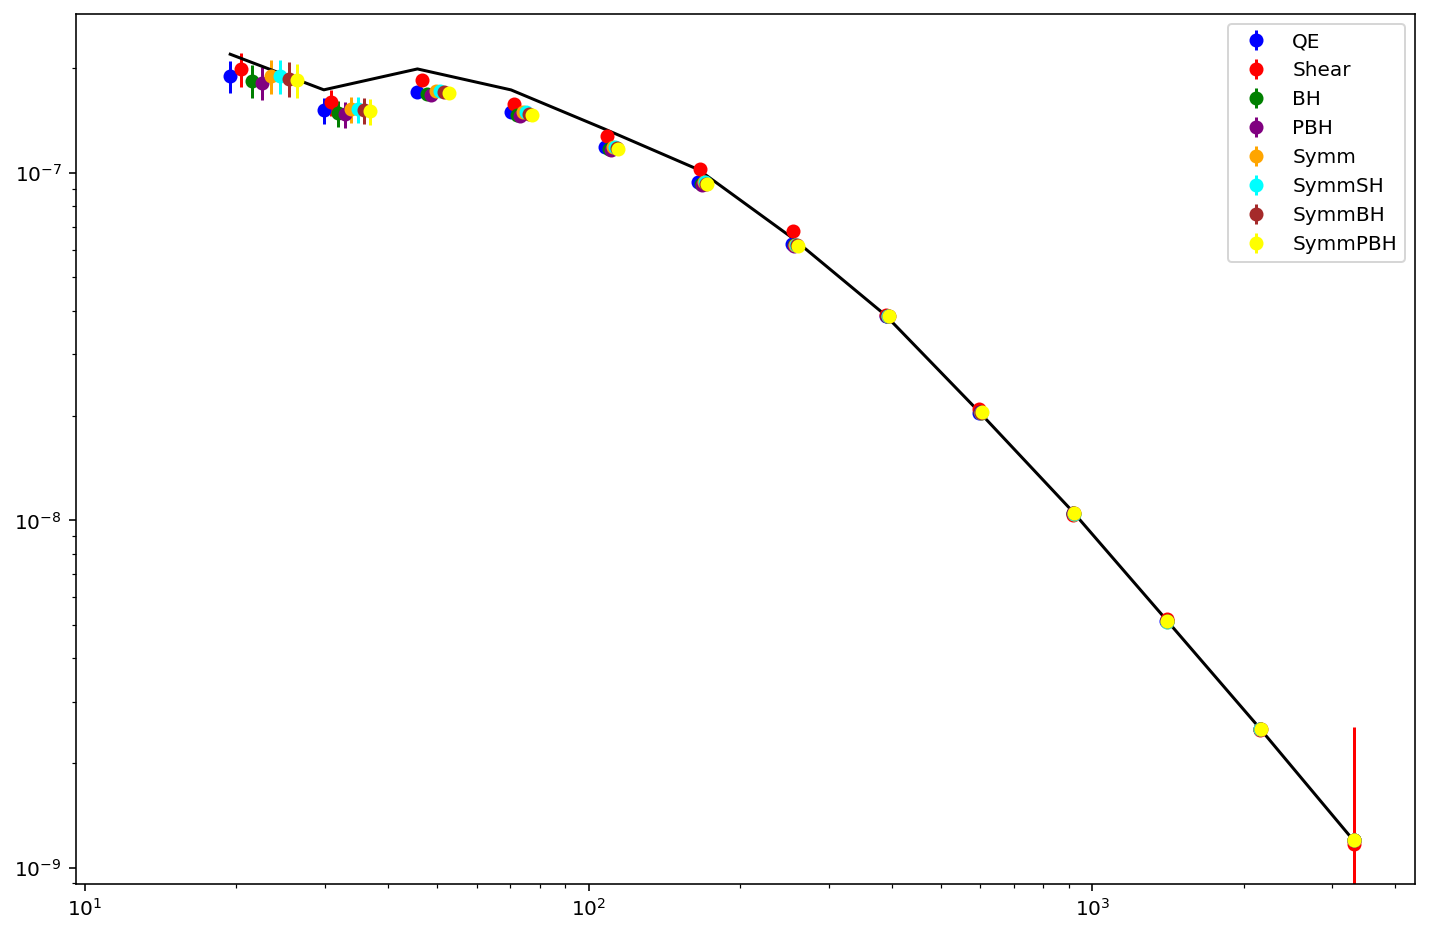

In [20]:
for e in estimators:
    tot = 0.
    kk = 0.
    dic.read(f'total_ilc_{0}')
    pmock = np.zeros((Nsims, len(dic.dictionary['ells'])))
    for i in range(Nsims):
        temp = dic.read(f'total_ilc_{i}')['val'][f'val-{e}']
        pmock[i] = np.nan_to_num(temp)
        kk += dic.dictionary['kk']
    tot, s = u.get_mean_and_scatter(Nsims, pmock)
    kk /= Nsims
    epsilon = 1
    plt.errorbar(dic.dictionary['ells']+epsilon*estimators.index(e), tot, s, color = colors_ests[e], label = labels_ests[e], ls = '', marker = 'o')
    
plt.plot(dic.dictionary['ells'], kk, color = 'black')
plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
estimators

['hu_ok', 'shear', 'bh', 'pbh', 'symm', 'symm-shear', 'symmbh', 'symmpbh']

In [22]:
direcmanu = '/scratch/r/rbond/omard/CORI17112020/extract_sehgal/LensQuEst-1/out_txt/'


lCen = np.loadtxt(pathlib.Path(direcmanu)/f'QE_3500.0_val_{0}.txt')[:, 0]
pmock = np.zeros((Nsims, len(lCen)))

pmocksum = np.zeros((Nsims, len(lCen)))

clkkmanu = 0


for i in range(Nsims):
    lCen, ClQauto, ClQcross, clkk, clkkth = np.loadtxt(pathlib.Path(direcmanu)/f'QE_3500.0_val_{i}.txt', unpack = True)
    pmock[i] = np.nan_to_num(ClQcross)
    #pmocksum[i] = np.nan_to_num(ClQcrossSum)
    clkkmanu += clkk
    
    #pmock[i] = (np.nan_to_num(ClQcross)-clkk)/clkk
    
clkkmanu /= Nsims
totmanu, smanu = u.get_mean_and_scatter(Nsims, pmock)

#totmanusum, smanusum = u.get_mean_and_scatter(Nsims, pmocksum)

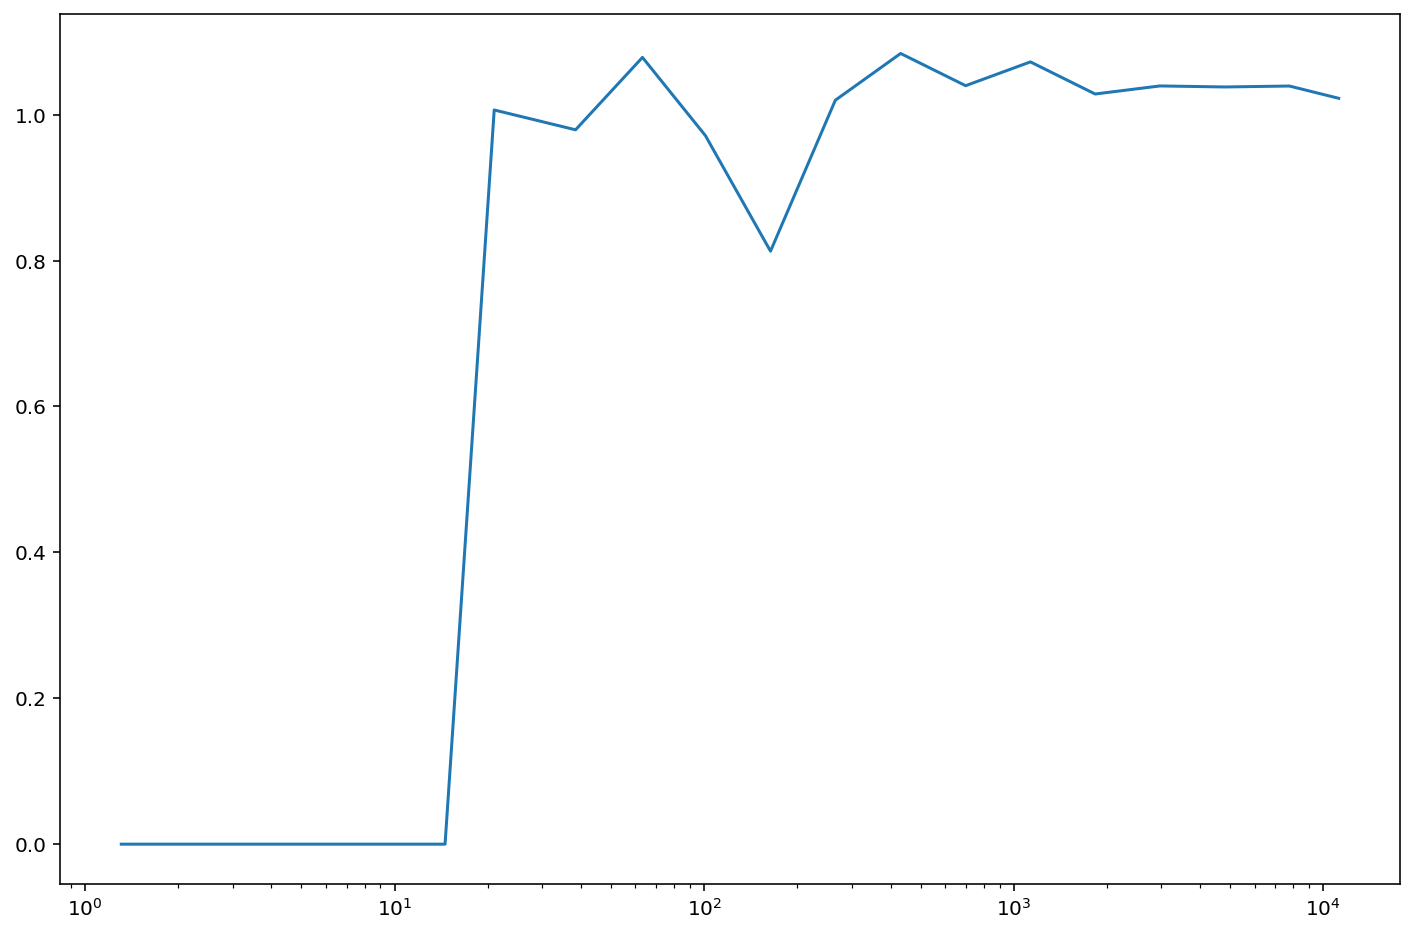

In [23]:
plt.plot(lCen, clkk/clkkth)
plt.xscale('log')

In [24]:
totmanu

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.94792837e-07, 1.92686168e-07,
       1.61047488e-07, 1.29594922e-07, 8.93175365e-08, 5.74305878e-08,
       3.16705707e-08, 1.54959843e-08, 7.41306147e-09, 3.55838619e-09,
       1.73145008e-09, 8.70463937e-10, 1.99044927e-10, 0.00000000e+00])

In [25]:
totmanu/clkkmanu

/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([       nan,        nan,        nan,        nan,        nan,
              nan, 0.86384063, 0.89267653, 0.88457185, 0.88476404,
       0.92642485, 0.96033016, 0.98542156, 0.98959152, 0.99243962,
       0.99300279, 0.99638676, 1.02207383, 0.48295381, 0.        ])

/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


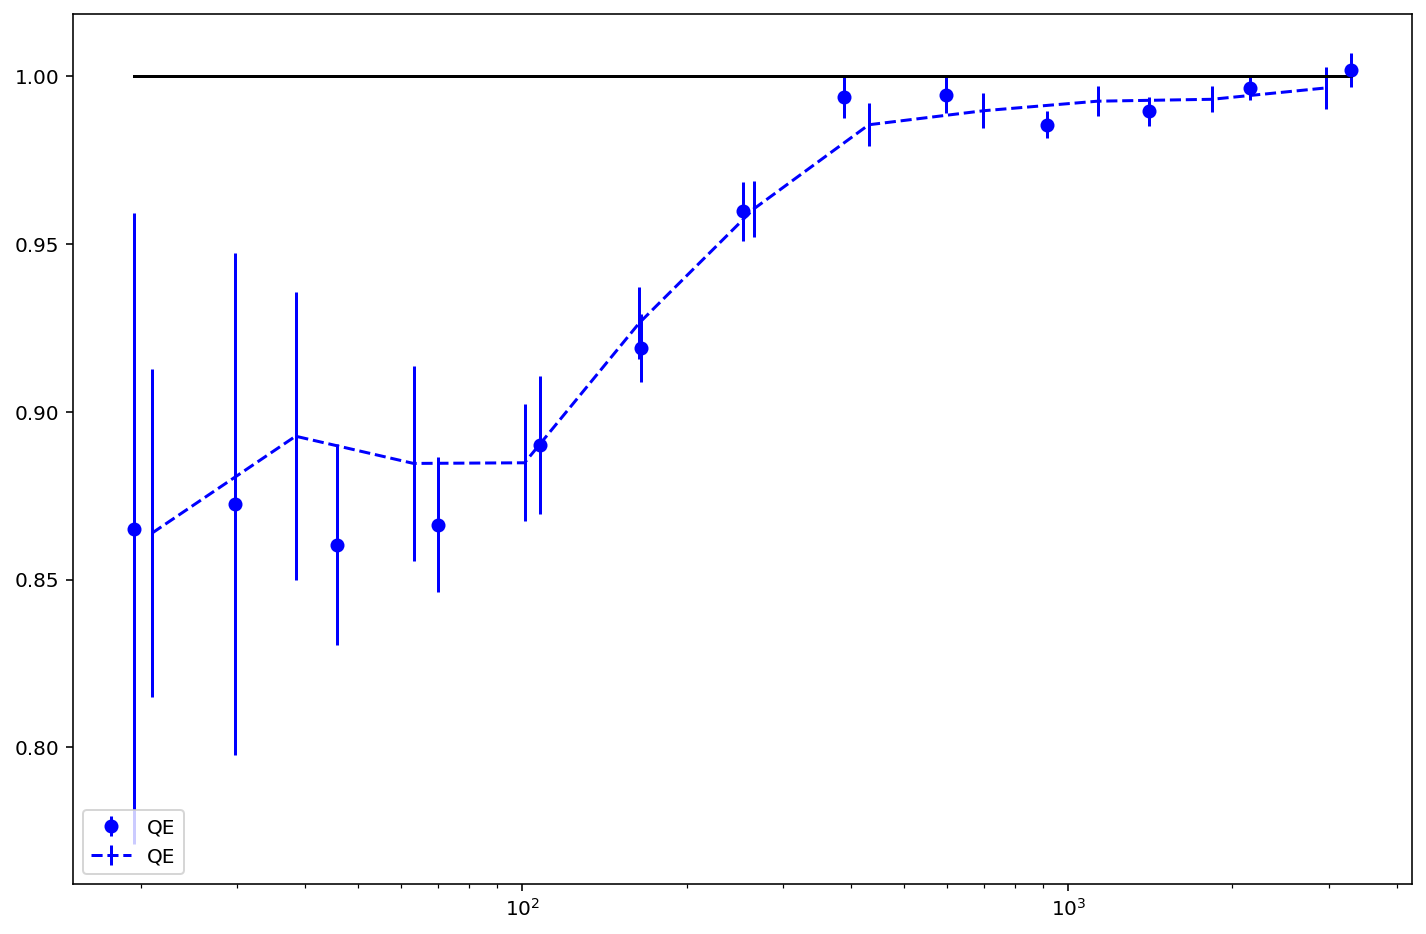

In [26]:
for e in ['hu_ok']:#, 'symm', 'symm-shear', 'symmbh']:
    tot = 0.
    kk = 0.
    dic.read(f'total_ilc_{0}')
    pmock = np.zeros((Nsims, len(dic.dictionary['ells'])))
    for i in range(Nsims):
        temp = dic.read(f'total_ilc_{i}')['val'][f'val-{e}']
        pmock[i] = np.nan_to_num(temp)
        kk += dic.dictionary['kk']
    tot, s = u.get_mean_and_scatter(Nsims, pmock)
    kk /= Nsims
    epsilon = 1
    plt.errorbar(dic.dictionary['ells']+epsilon*estimators.index(e), tot/kk, s/kk, color = colors_ests[e], label = labels_ests[e], ls = '', marker = 'o')
    
    plt.errorbar(lCen[lCen<4000]+epsilon*estimators.index(e), (totmanu/clkkmanu)[lCen<4000], (smanu/clkkmanu)[lCen<4000], color = colors_ests[e], label = labels_ests[e], ls = '--')
    
    #plt.errorbar(lCen[lCen<4000]+epsilon*estimators.index(e), (totmanusum/clkkmanu)[lCen<4000], (smanusum/clkkmanu)[lCen<4000], color = colors_ests[e], label = labels_ests[e], ls = ':')
    
plt.plot(dic.dictionary['ells'], kk/kk, color = 'black')
plt.legend(loc = 'best')
plt.xscale('log')
#plt.yscale('log')
plt.show()

## Check Total CMB power

No handles with labels found to put in legend.


[0.00000000e+00 2.14473115e+01 8.70399198e+00 4.58208940e+00
 2.41016944e+00 1.64308896e+00 1.12817213e+00 5.64432586e-01
 1.09913151e-01 4.15607014e-02 1.39833335e-02 2.67395189e-03
 3.21535126e-04 3.59558085e-05]


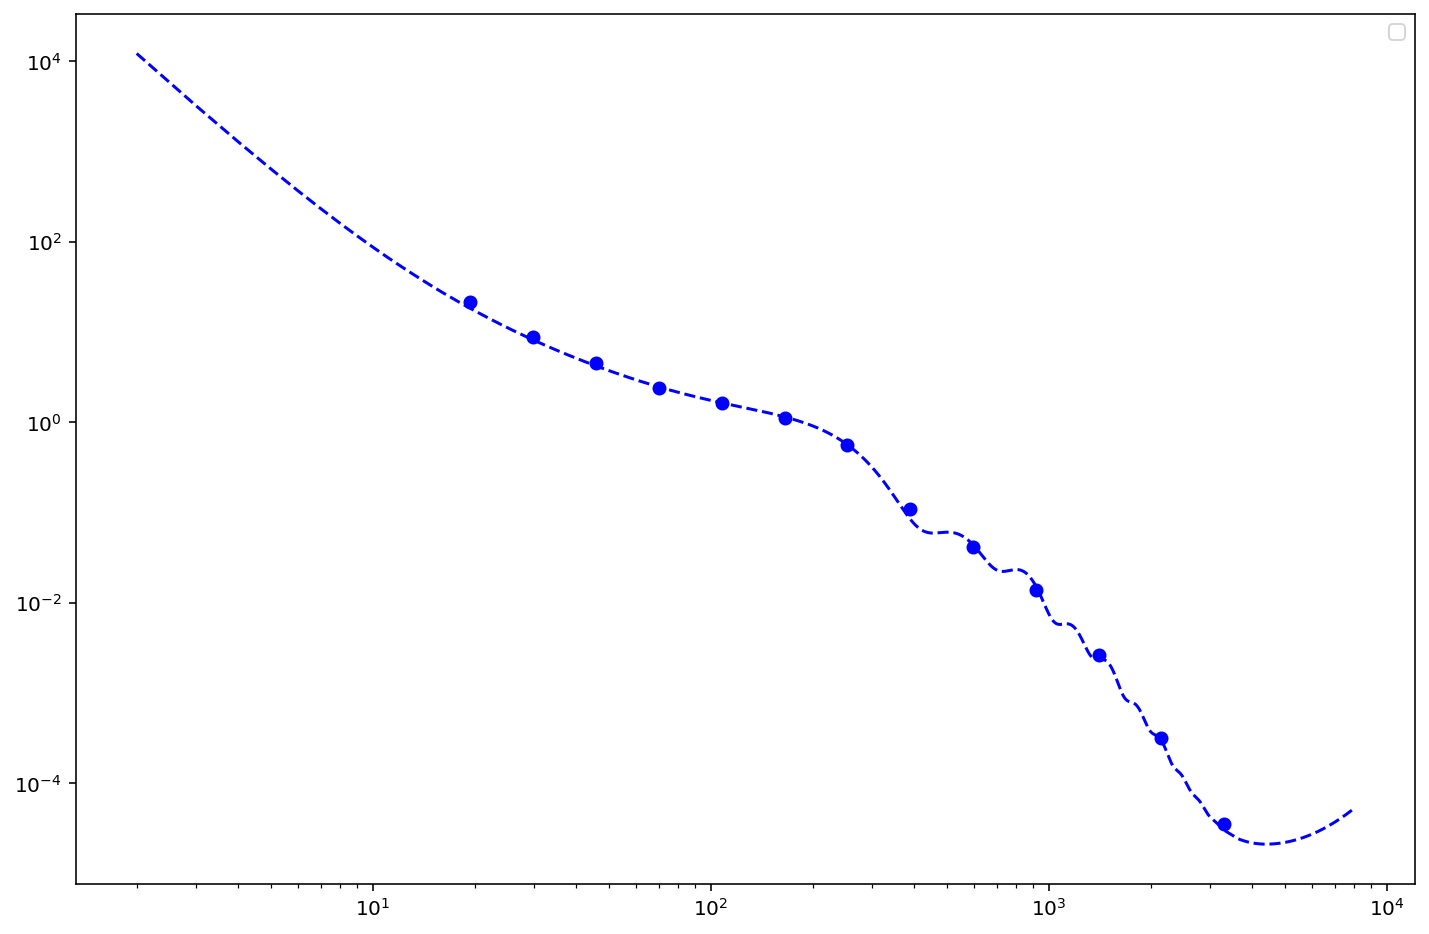

In [27]:
elilc, powerilc = np.loadtxt('input_spectra/power_ilc.txt', unpack = True)

tot = 0.
kk = 0.
dic.read(f'total_ilc_{0}')
pmock = np.zeros((Nsims, len(dic.dictionary['ells'])))
for i in range(Nsims):
    temp = dic.read(f'total_ilc_{i}')['val']['inputcmbgauss']
    pmock[i] = np.nan_to_num(temp)
    kk += dic.dictionary['kk']
tot, s = u.get_mean_and_scatter(Nsims, pmock)
kk /= Nsims
print(tot)
epsilon = 1
#+epsilon*estimators.index(e)
plt.plot(elilc, powerilc, color = colors_ests[e], ls = '--')
plt.errorbar(dic.dictionary['ells'], tot, s, color = colors_ests[e], ls = '', marker = 'o')
plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.show()

## ReconxRecon

In [28]:
estimatorcombs = list(itertools.combinations_with_replacement(list(estimators), 2))

In [33]:
estimatorcombs = list(itertools.combinations_with_replacement(list(['hu_ok', 'symm']), 2))

[0.00000000e+00 6.59268777e-08 6.50122884e-08 6.81670119e-08
 7.13242310e-08 7.53881159e-08 8.51430495e-08 1.01710150e-07
 1.09918291e-07 1.11001874e-07 1.11070284e-07 1.12169159e-07
 1.35871796e-07 3.03500648e-07]
[0.00000000e+00 6.80333701e-08 6.57363994e-08 6.73791111e-08
 7.22876638e-08 7.57122784e-08 8.46376865e-08 1.01985845e-07
 1.09934296e-07 1.10998476e-07 1.11070891e-07 1.12185379e-07
 1.35873006e-07 3.03505534e-07]
[0.00000000e+00 7.89239609e-08 7.36866789e-08 7.52347506e-08
 8.19600410e-08 8.52398797e-08 9.45926421e-08 1.14817515e-07
 1.22528860e-07 1.21276966e-07 1.17198536e-07 1.14232050e-07
 1.36622590e-07 3.07376738e-07]


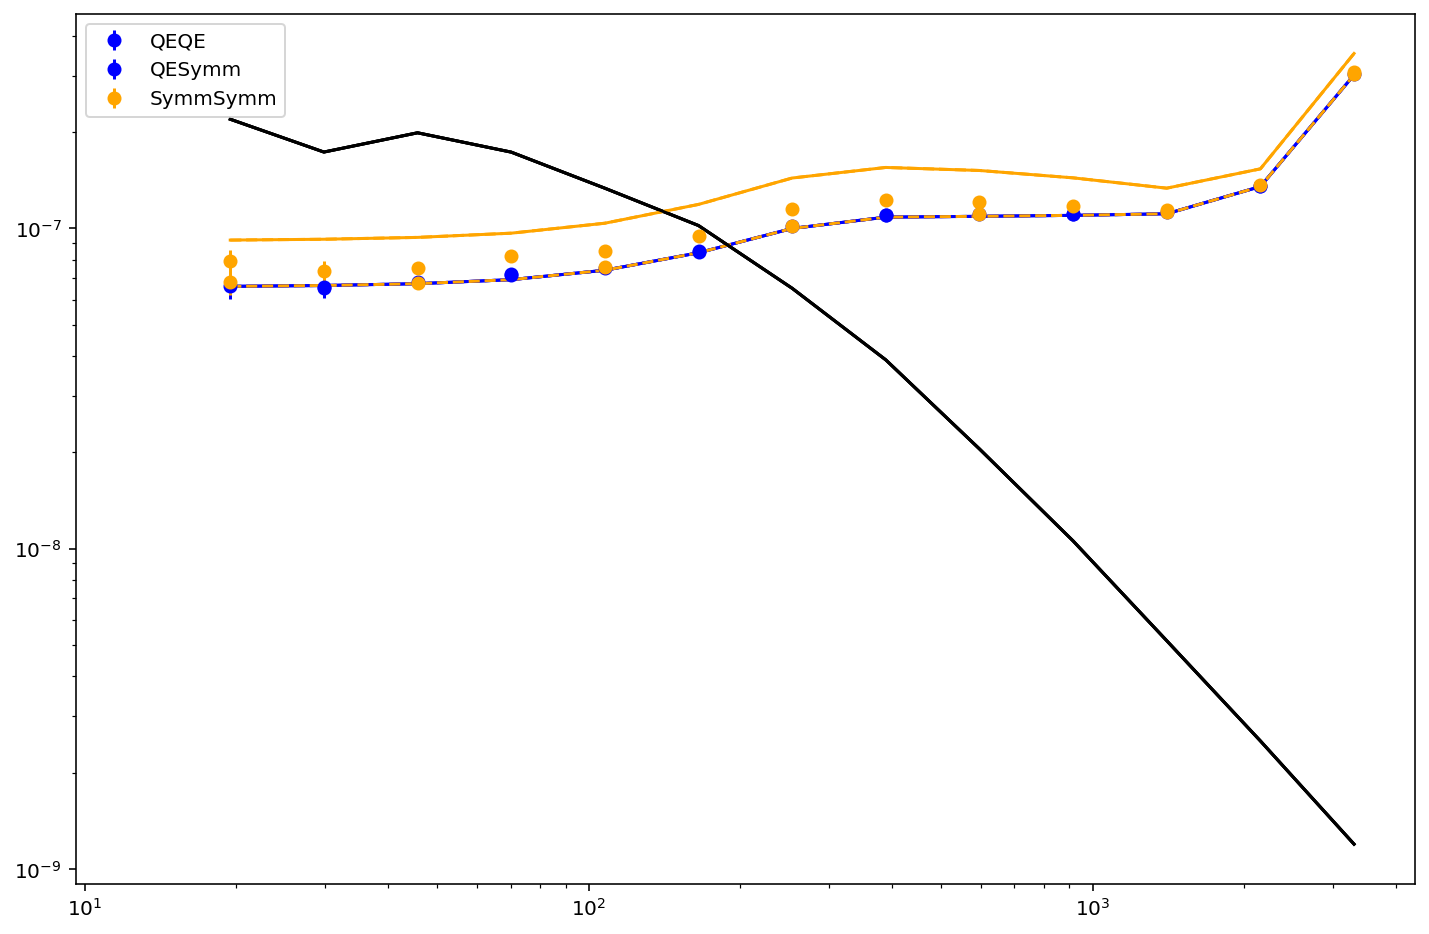

In [35]:
for est1, est2 in estimatorcombs:
    tot = 0.
    kk = 0.
    dic.read(f'total_ilc_{0}')
    pmock = np.zeros((Nsims, len(dic.dictionary['ells'])))
    for i in range(Nsims):
        temp = dic.read(f'total_ilc_{i}')['val'][f'val-auto-{est1}-{est2}']
        pmock[i] = np.nan_to_num(temp)
        kk += dic.dictionary['kk']
    tot, s = u.get_mean_and_scatter(Nsims, pmock)
    kk /= Nsims
    print(tot)
    epsilon = 1

    noise = dic.dictionary['N'][f'N-{est1}-{est2}']
    #+epsilon*estimators.index(e)
    plt.plot(dic.dictionary['ells'], noise, color = colors_ests[est1], ls = '-')
    plt.plot(dic.dictionary['ells'], noise, color = colors_ests[est2], ls = '--')
    
    Nells = len(dic.dictionary['ells'])
    
    selection1 = np.arange(0, Nells) % 2 == 0
    selection2 = np.arange(0, Nells) % 2 != 0
    
    plt.errorbar(dic.dictionary['ells'][selection1], tot[selection1], s[selection1], color = colors_ests[est1], label = labels_ests[est1]+labels_ests[est2], ls = '', marker = 'o')
    plt.errorbar(dic.dictionary['ells'][selection2], tot[selection2], s[selection2], color = colors_ests[est2], ls = '', marker = 'o')
    
    plt.plot(dic.dictionary['ells'], kk, color = 'black')
    plt.legend(loc = 'best')
    plt.xscale('log')
    plt.yscale('log')
plt.show()